# Attribute information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



After we have all the informations we need about every single attribute let's get started


We will import the necessary libraries as shown below

In [3]:
#Reminder if you didnt have any of these package try to run "pip3.7 install <Package_Name>"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap

After that we will read the data from CSV file 

In [4]:
#Redefine the My CSV PATH to your local CSV file
df = pd.read_csv("../../Downloads/online_shoppers_intention.csv")
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


We will check if there is also missing values in the Dataset





In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

since we dont have any missing value in this Dataset we will analyze it 

We will describe the dataset to understand it

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Then we will use Heatmap to see the correlation between each attribute in the Dataset

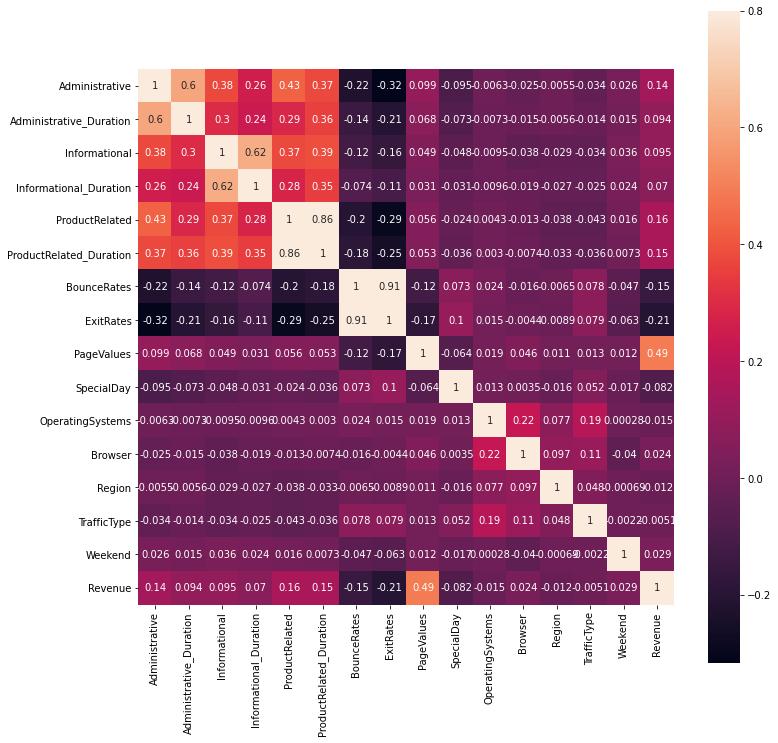

In [7]:
dfcorr = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfcorr, vmax=.8, square=True, annot = True);

As we can see in the Heatmap, the most correlated value is Revenue with PageValues.
let's first check the percentage of people who made a profitable action.

Text(0.5, 1.0, 'Total Revenue counts')

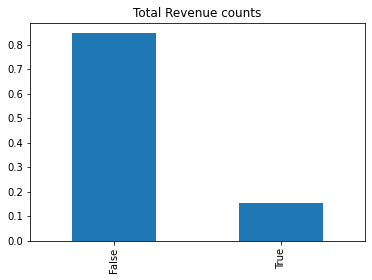

In [8]:
df['Revenue'].value_counts(normalize=True).plot(kind='bar')
plt.title('Total Revenue counts')

We will see now Conversions and the impressions without conversions by months 

Text(0.5, 1.0, 'impressions without conversions by months')

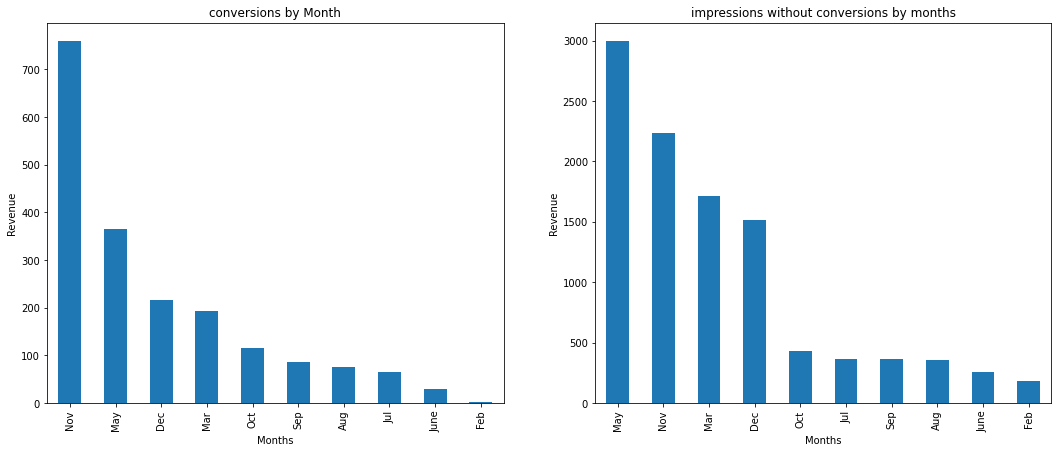

In [9]:
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(1,2,1)
df['Month'][(df['Revenue'] == True)].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('conversions by Month')


plt.subplot(1,2,2)
df['Month'][df['Revenue'] == False].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('impressions without conversions by months')

As we see, November is the month where people made the most conversions and the ones that didn't convert, let's see now which people made conversions, when and by which operating System.

Text(0.5, 1.0, 'Purchase on Weekend')

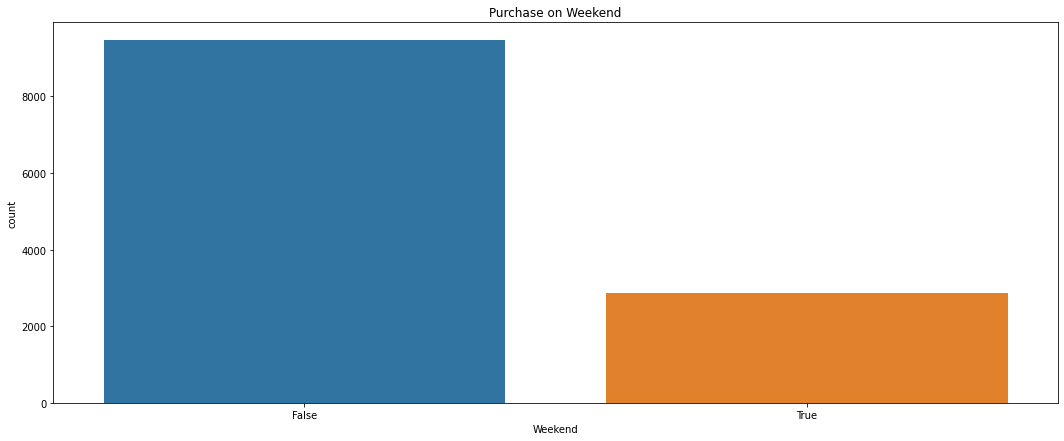

In [10]:
sns.countplot(df['Weekend'])
plt.title('Purchase on Weekend')

Text(0.5, 1.0, 'Visitors Type')

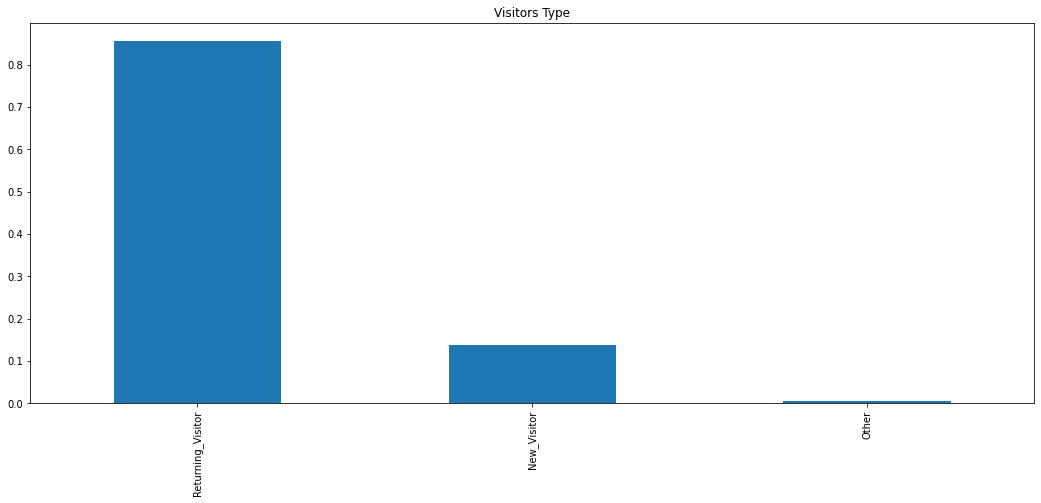

In [11]:
df['VisitorType'].value_counts(normalize=True).plot(kind='bar')
plt.title('Visitors Type')

Text(0.5, 1.0, 'Visitors type whom buy')

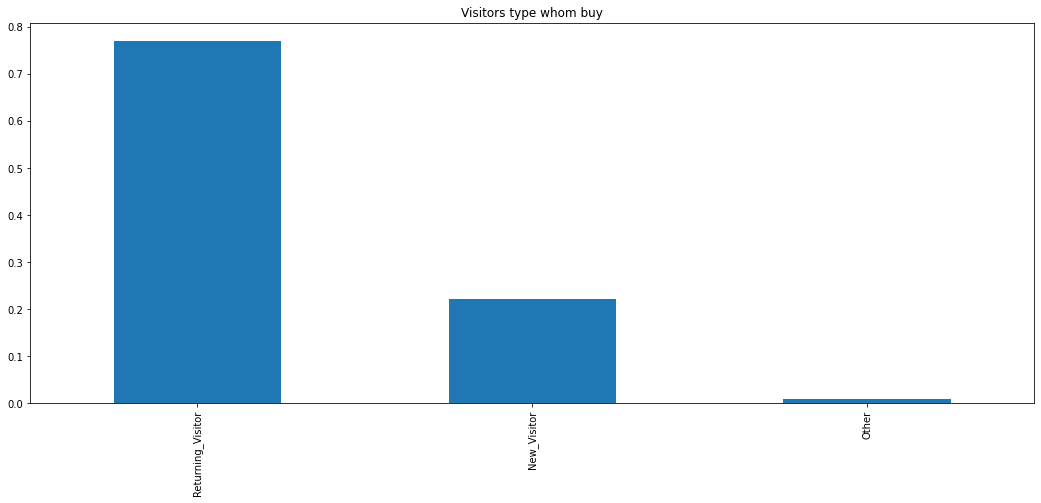

In [24]:
df['VisitorType'][df['Revenue']== True].value_counts(normalize=True).plot(kind='bar')
plt.title('Visitors type whom buy')

In [13]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

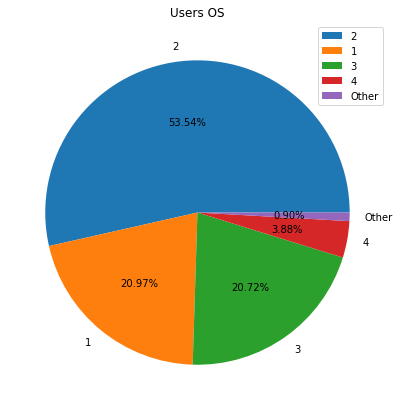

In [14]:
labels = "2", "1", "3", "4", "Other"
size = [6601, 2585, 2555, 478, 111]
explode = [0, 0, 0, 0, 0]
plt.pie(size, labels=labels, explode=explode, autopct= '%.2f%%')
plt.title('Users OS')
plt.legend()

# Data Preprocessing

now let's convert the categorical data using dummie variables 

In [15]:
new_df = pd.get_dummies(df)
new_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

Now we will transforme our target "Revenue" using 1 hot encoder (we use it for categorical data)

In [16]:
lenco = LabelEncoder()
new_df['Revenue'] = lenco.fit_transform(new_df['Revenue'])
new_df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

now we will Split the Data to training data and testing data with test size equal to 30 percent of all the simples

In [17]:
X = new_df.drop(['Revenue'], axis=1)
y = new_df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)


Then we will use the xgboost model as our predective model because he allow us to develop fast exact tree solutions for SHAP (SHapley Additive exPlanation) values, which are the unique consistent and locally accurate attribution values also propose a rich visualization of individualized feature attributions that improves over classic attribution summaries and partial dependence plots.
we will use 0.01 as learning rate and the algorithme that we will use is logistic regression for binary classification 

In [18]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.44959
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.28248
[200]	test-logloss:0.25090
[300]	test-logloss:0.24291
[400]	test-logloss:0.24206
Stopping. Best iteration:
[474]	test-logloss:0.24176



# Build the feature importance

we will build the importance feature to see different features that made an impact to our model

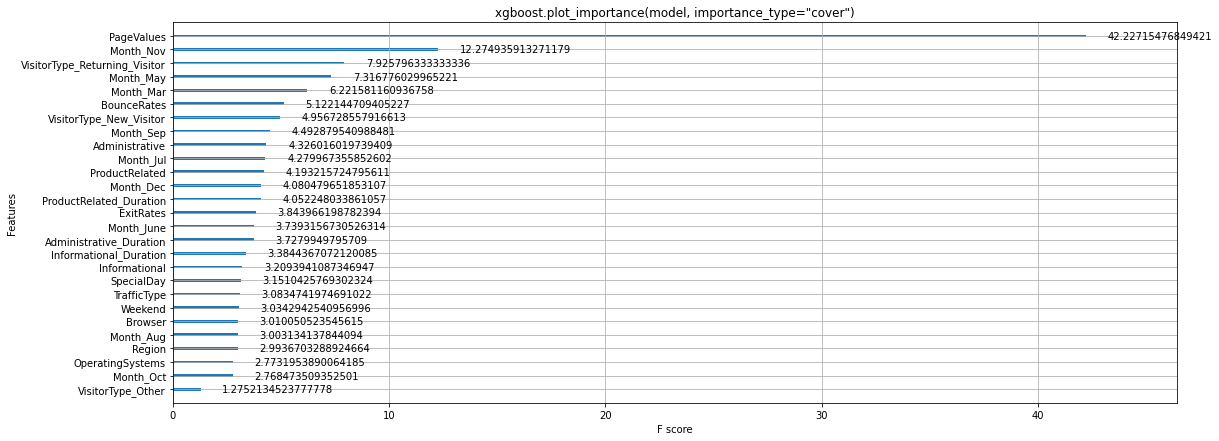

In [19]:
xgboost.plot_importance(model, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

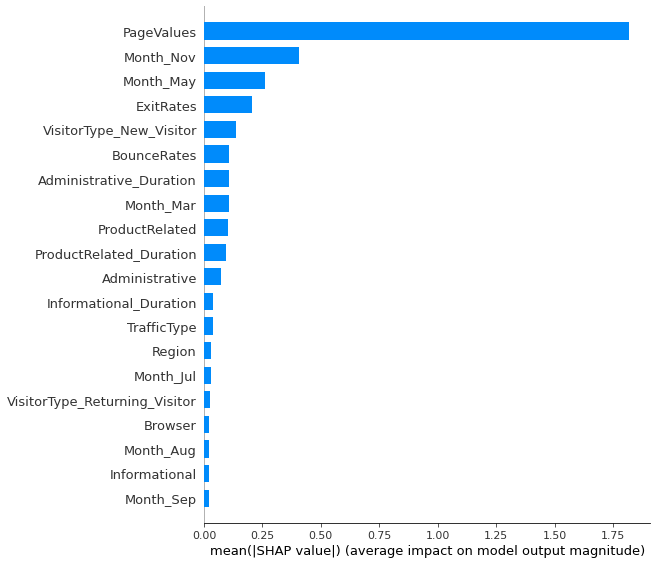

In [21]:
shap.summary_plot(shap_values, X, plot_type="bar")

As we see in the bar graph above that PageValues Month_Nov Month_may ExitRates NewVisitors BonceRate are the most likely features that has impact to the Revenue so we will see next the impact on the output Value

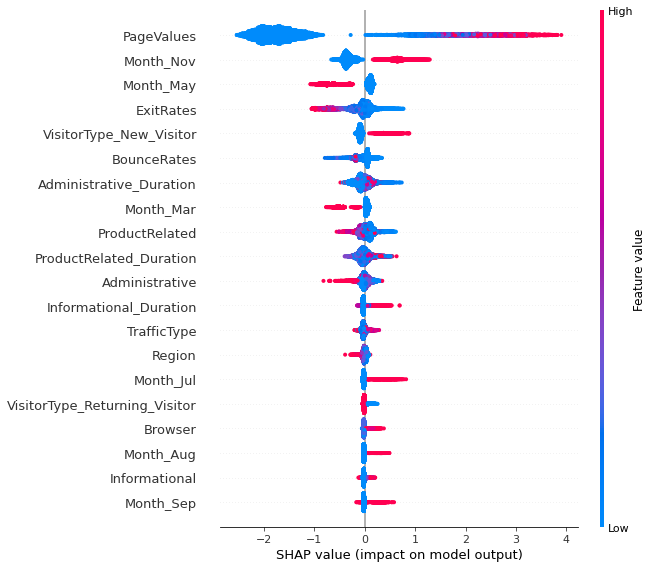

In [22]:
shap.summary_plot(shap_values, X)

as we see that PageValues Month_Nov New_visitors with high value have more impact to the output "Revenue" rather then ExitRates and Month_May who has a high negative impact "Revenue down"